In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("fivethirtyeight")

from sklearn.metrics import mean_squared_error

In [19]:
x = 2 * np.random.rand(100,1)
y = 5 + 4 * x + np.random.randn(100,1)

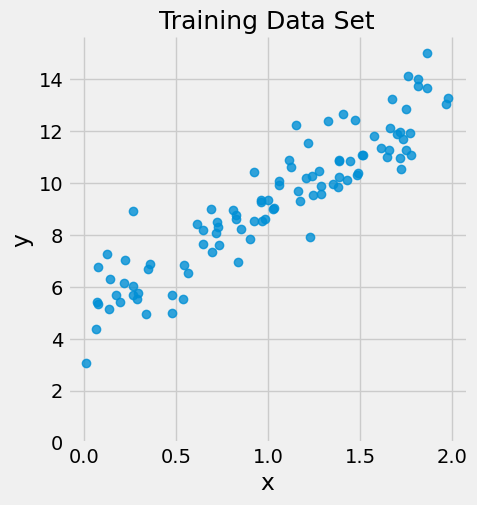

In [20]:
regression_df = pd.DataFrame({'x':x.flatten(), 'y':y.flatten()})

sns.lmplot(x='x', y='y', data=regression_df, fit_reg=False).set(ylim=(0, None))
plt.title('Training Data Set', fontsize=18);

In [21]:
# x_with_intercept = np.c_[np.ones((len(x),1)), x]
# params_optimal = np.linalg.inv(x_with_intercept.T.dot(x_with_intercept)).dot(x_with_intercept.T).dot(y)
# print(params_optimal)

In [22]:
def plot_regression(x, y, y_pred, params=None, title="Linear Regression"):
    
    plt.figure(figsize=(16,3))
    plt.rcParams['figure.dpi'] = 227
    plt.scatter(x, y, label='Data', c='blue', s=6)
    if not params == None:
        for i in range(len(params)):
            plt.plot(x, params[i][0]*x + params[i][1], lw=1, c='violet', alpha=0.35)
    plt.plot(x, y_pred, c='purple', lw=3, label='Linear Regression')
    plt.title(title, fontsize=14)
    plt.xlabel('X', fontsize=11)
    plt.ylabel('Y', fontsize=11)
    plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
    plt.tick_params(direction='out', length=6, color='blue', width=1, grid_alpha=.6)
    plt.show()

In [23]:
def batch_gradient_descent(x, y, learning_rate, iterations):
    
    '''
    Batch Gradient Descent implication. Inputs random
    m and b values to start iteration. Returns optimal 
    model parameters as well as historical loss values.  
    '''
    
    m, b = 0.5, 0.5 # parameters
    params, loss = [], [] # lists to store learning process
    N = len(x) # number of samples
    
    for iteration in range(iterations):
                
        func = y - (m*x + b)
    
        # Updating m and b
        m -= learning_rate * (-2 * x.T.dot(func).sum() / N) 
        b -= learning_rate * (-2 * func.sum() / N)
        
        params.append((m, b))
        loss.append(mean_squared_error(y, (m*x + b)))        
    
    return m, b, params, loss

In [25]:
!pip install ipython-autotime
%load_ext autotime
# %unload_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.9 MB/s eta 0:00:00
time: 478 µs (started: 2023-05-19 21:09:23 +00:00)


In [26]:
m, b, params, loss = batch_gradient_descent(x, y, learning_rate=0.01, iterations=1000)

time: 367 ms (started: 2023-05-19 21:09:29 +00:00)


m: 4.2786937042395055 b: 4.888891881581955
MSE: 0.9589138702218075


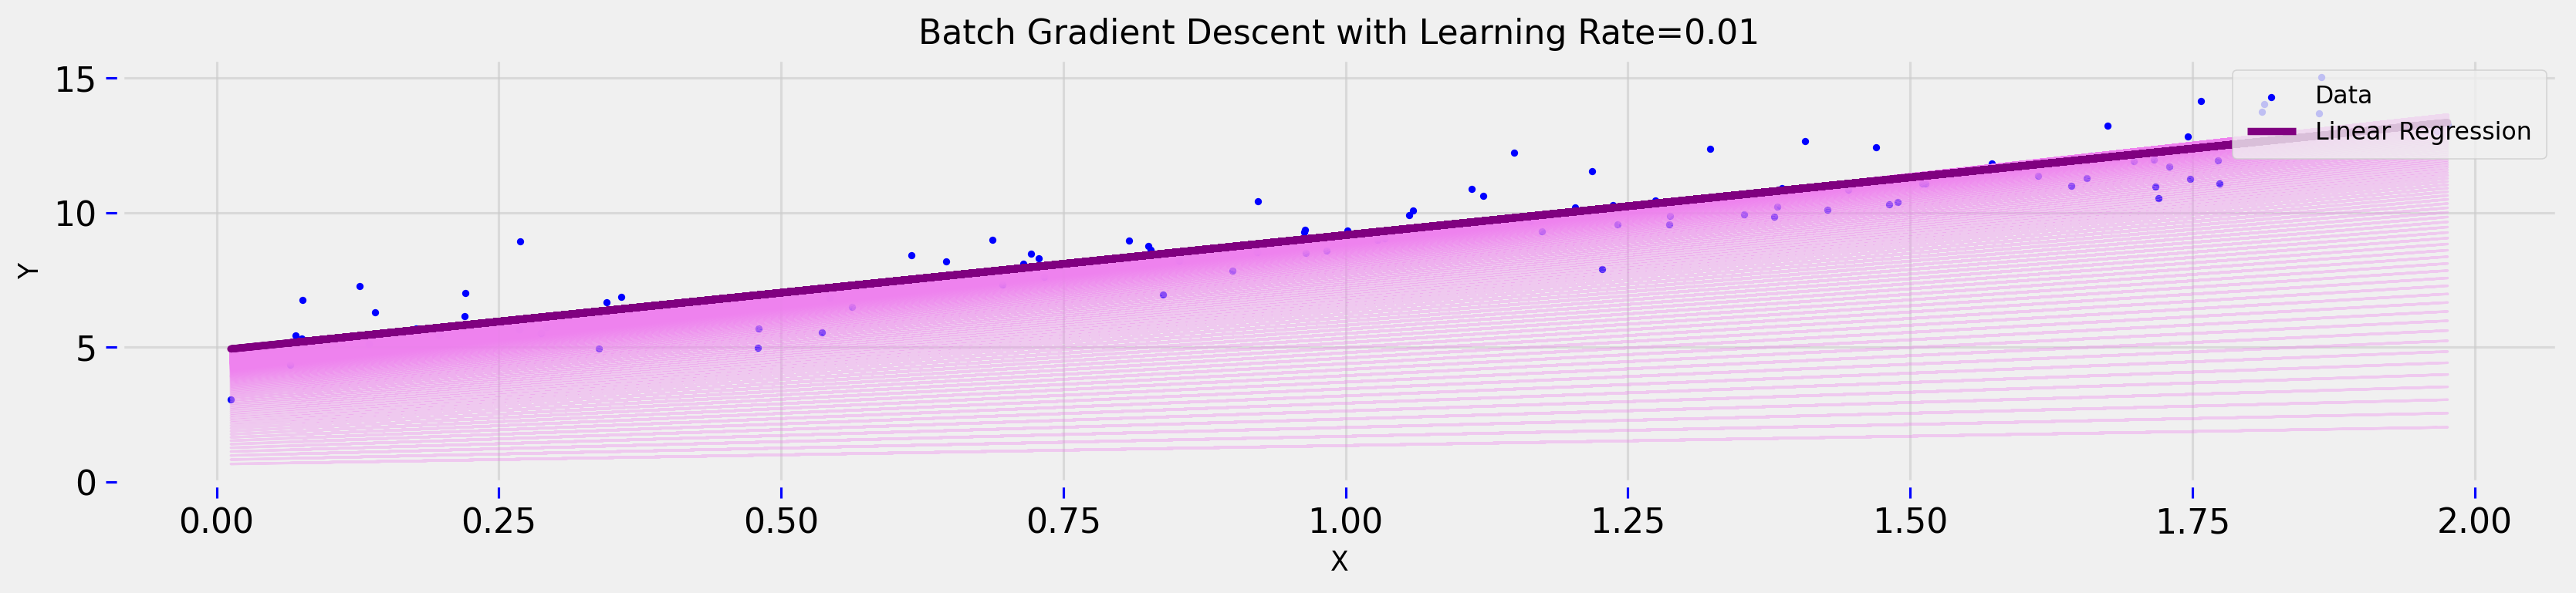

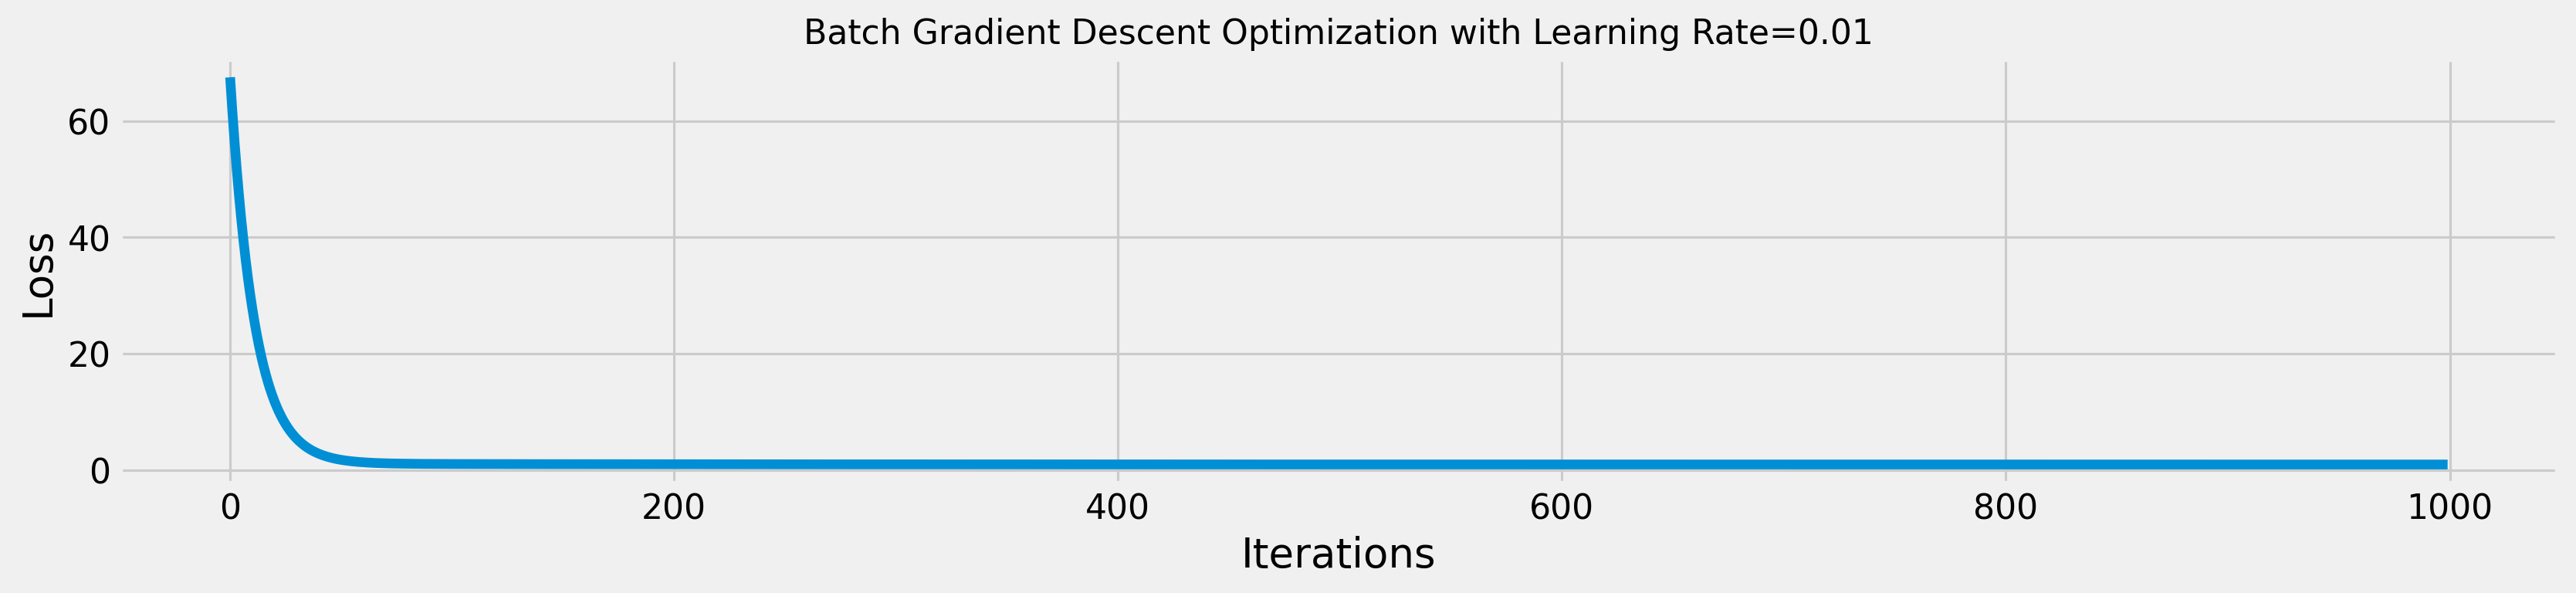

time: 15 s (started: 2023-05-19 21:10:17 +00:00)


In [28]:
y_predicted = m*x + b

print("m:", m, "b:", b)
print("MSE:", mean_squared_error(y, y_predicted))
plot_regression(x, y, y_predicted, params=params, title="Batch Gradient Descent with Learning Rate=0.01")

plt.figure(figsize=(16,3))
plt.rcParams['figure.dpi'] = 227
plt.plot(range(len(loss)), loss)
plt.title('Batch Gradient Descent Optimization with Learning Rate=0.01', fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()


In [29]:
m, b, params, loss = batch_gradient_descent(x, y, learning_rate=0.001, iterations=1000)

time: 522 ms (started: 2023-05-19 21:24:09 +00:00)


m: 4.675335142125895 b: 4.312813608763158
MSE: 1.0479736456224216


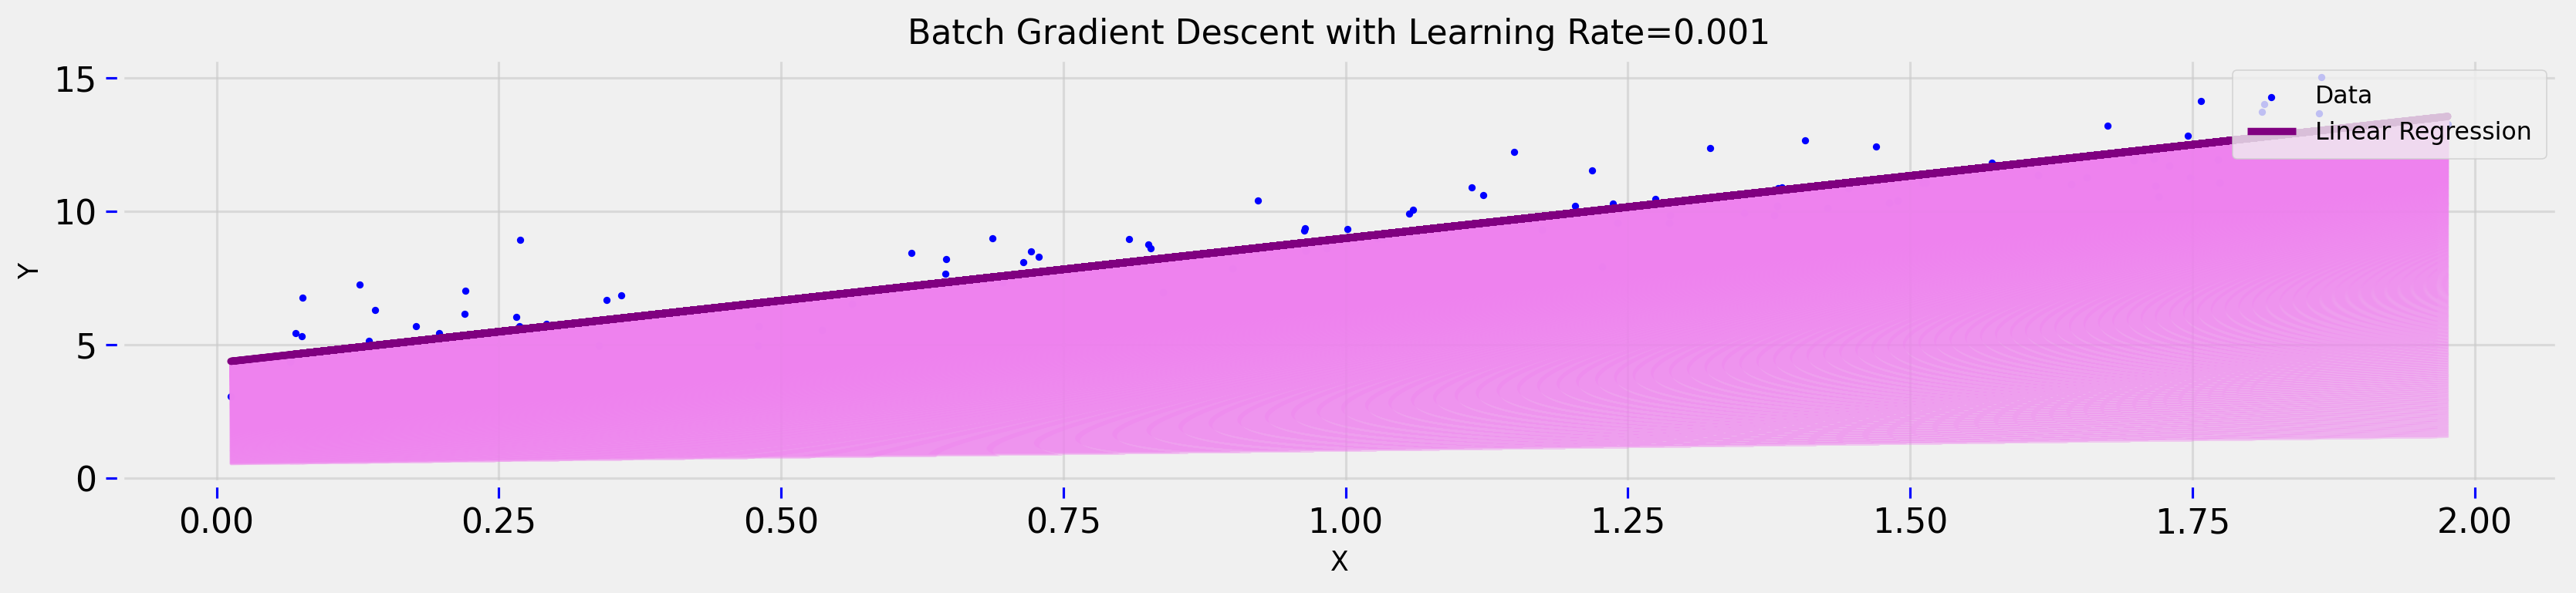

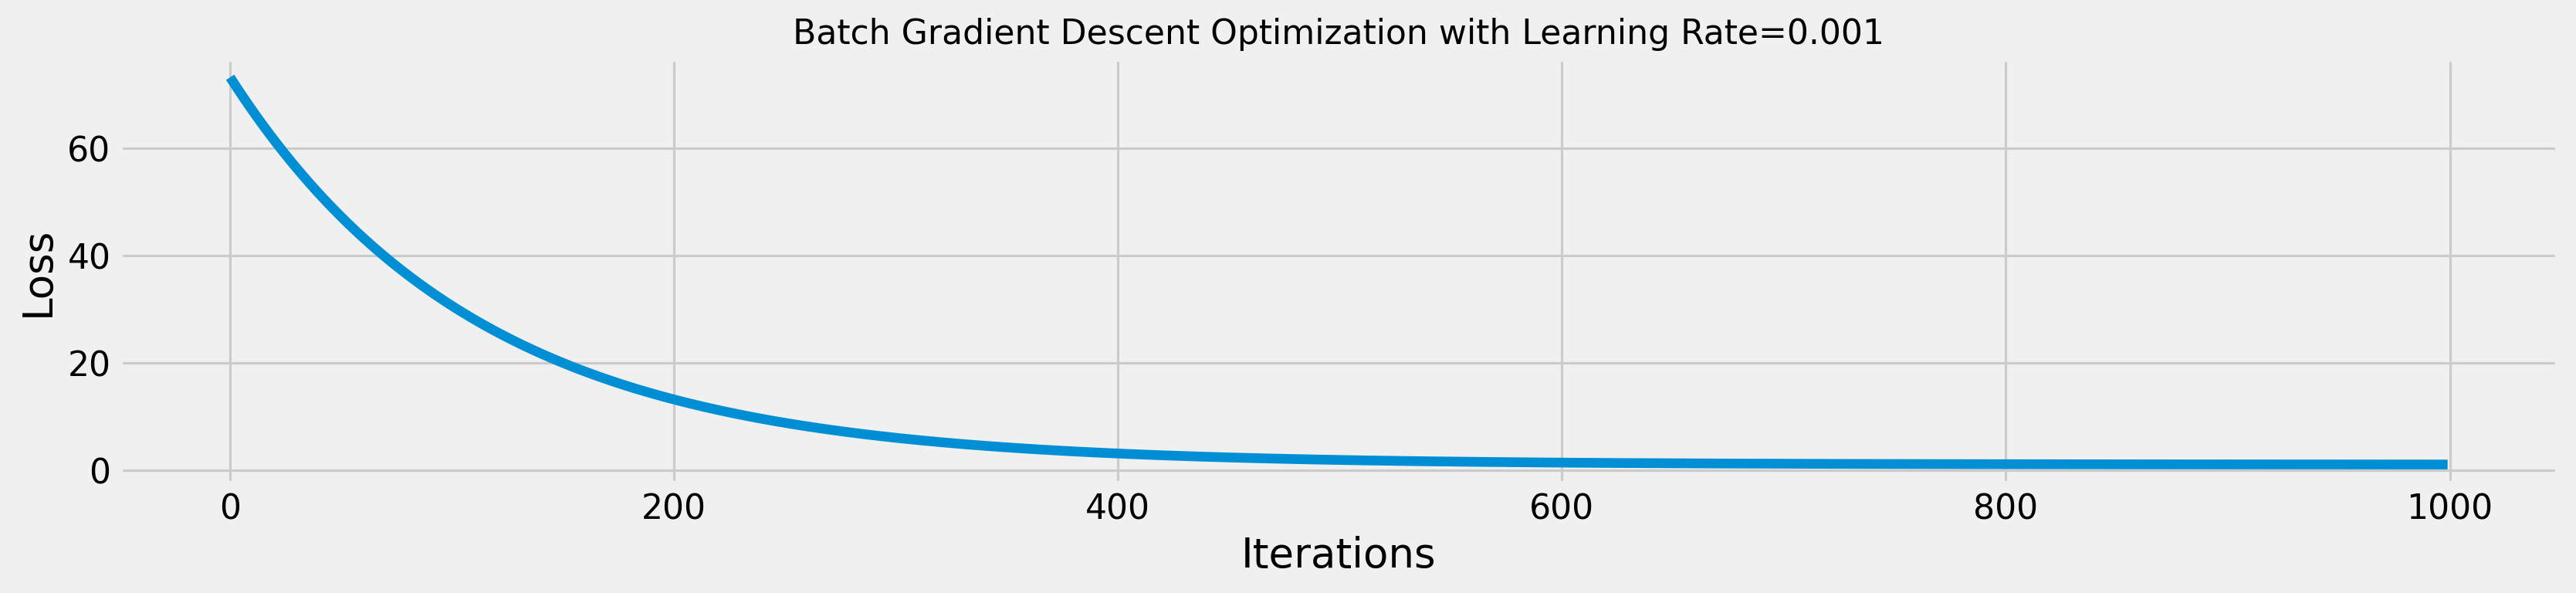

time: 14.4 s (started: 2023-05-19 21:24:13 +00:00)


In [30]:
y_predicted = m*x + b

print("m:", m, "b:", b)
print("MSE:", mean_squared_error(y, y_predicted))
plot_regression(x, y, y_predicted, params=params, title="Batch Gradient Descent with Learning Rate=0.001")

plt.figure(figsize=(16,3))
plt.rcParams['figure.dpi'] = 227
plt.plot(range(len(loss)), loss)
plt.title('Batch Gradient Descent Optimization with Learning Rate=0.001', fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()


In [31]:
m, b, params, loss = batch_gradient_descent(x, y, learning_rate=0.1, iterations=1000)

time: 214 ms (started: 2023-05-19 21:33:13 +00:00)


m: 4.239159525470142 b: 4.936116874200128
MSE: 0.958385724769294


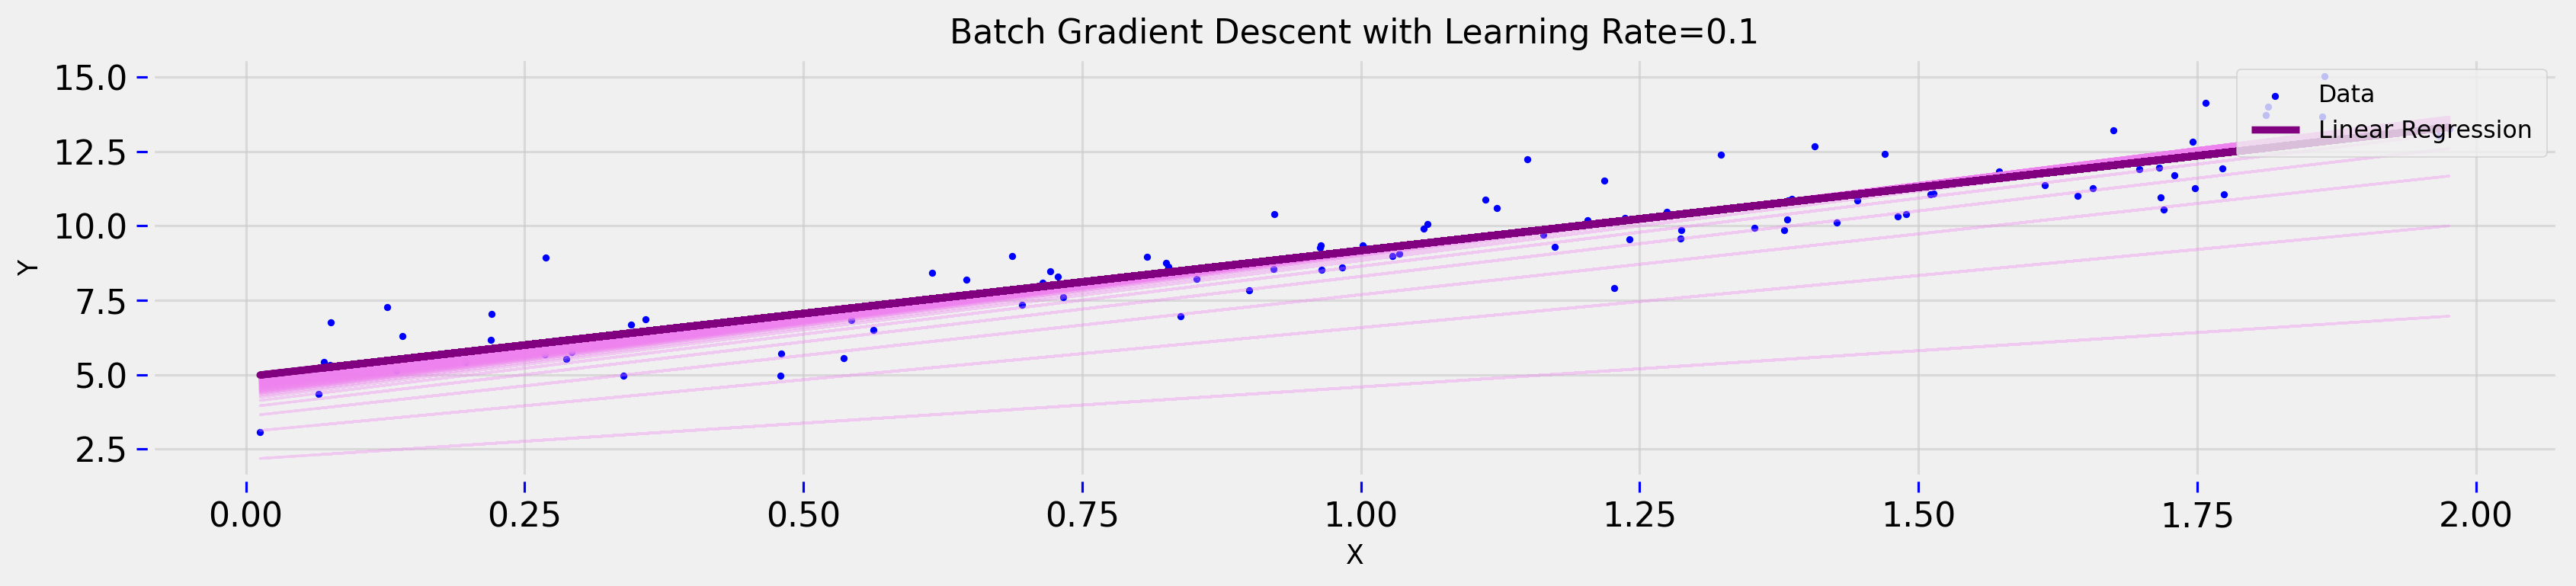

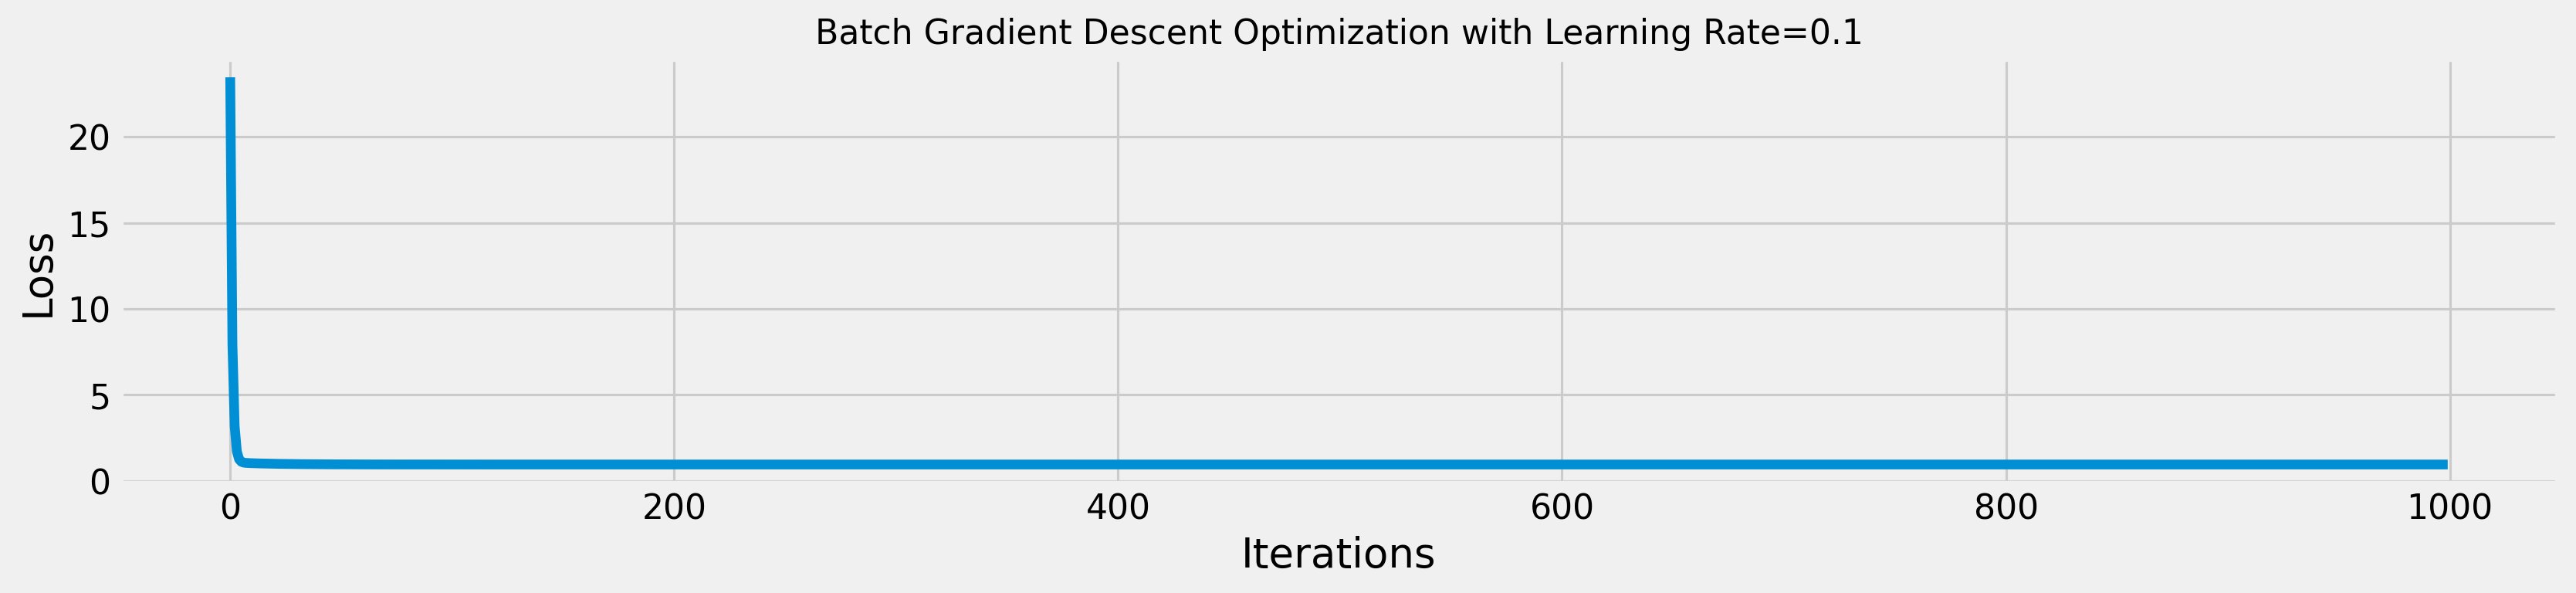

time: 14.6 s (started: 2023-05-19 21:33:16 +00:00)


In [32]:
y_predicted = m*x + b

print("m:", m, "b:", b)
print("MSE:", mean_squared_error(y, y_predicted))
plot_regression(x, y, y_predicted, params=params, title="Batch Gradient Descent with Learning Rate=0.1")

plt.figure(figsize=(16,3))
plt.rcParams['figure.dpi'] = 227
plt.plot(range(len(loss)), loss)
plt.title('Batch Gradient Descent Optimization with Learning Rate=0.1', fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()


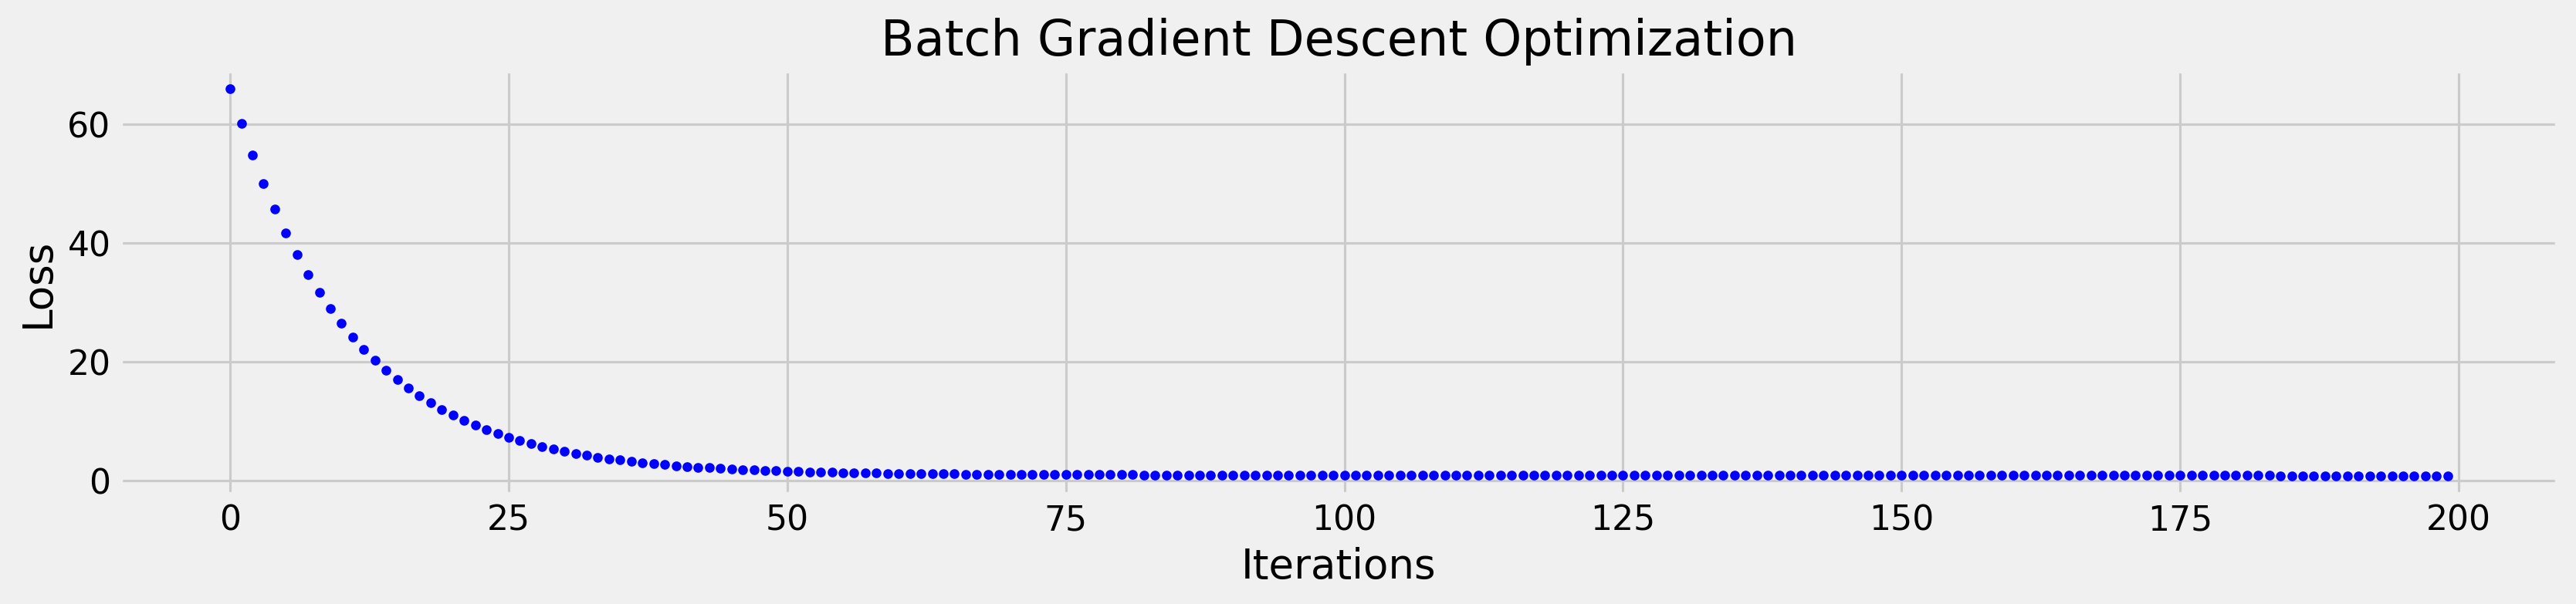

time: 1.28 s (started: 2023-05-18 22:31:21 +00:00)


In [78]:
fig, ax = plt.subplots(figsize=(16,3))

ax.set_ylabel('Loss')
ax.set_xlabel('Iterations')
ax.set_title('Batch Gradient Descent Optimization')
_ = ax.plot(range(200), mse[:200], 'b.')

In [39]:
_,_,_, cost_values_1 = batch_gradient_descent(x, y, 0.1, 400)
_,_,_, cost_values_2 = batch_gradient_descent(x, y, 0.01, 400)
_,_,_, cost_values_3 = batch_gradient_descent(x, y, 0.001, 400)

time: 347 ms (started: 2023-05-19 21:59:50 +00:00)


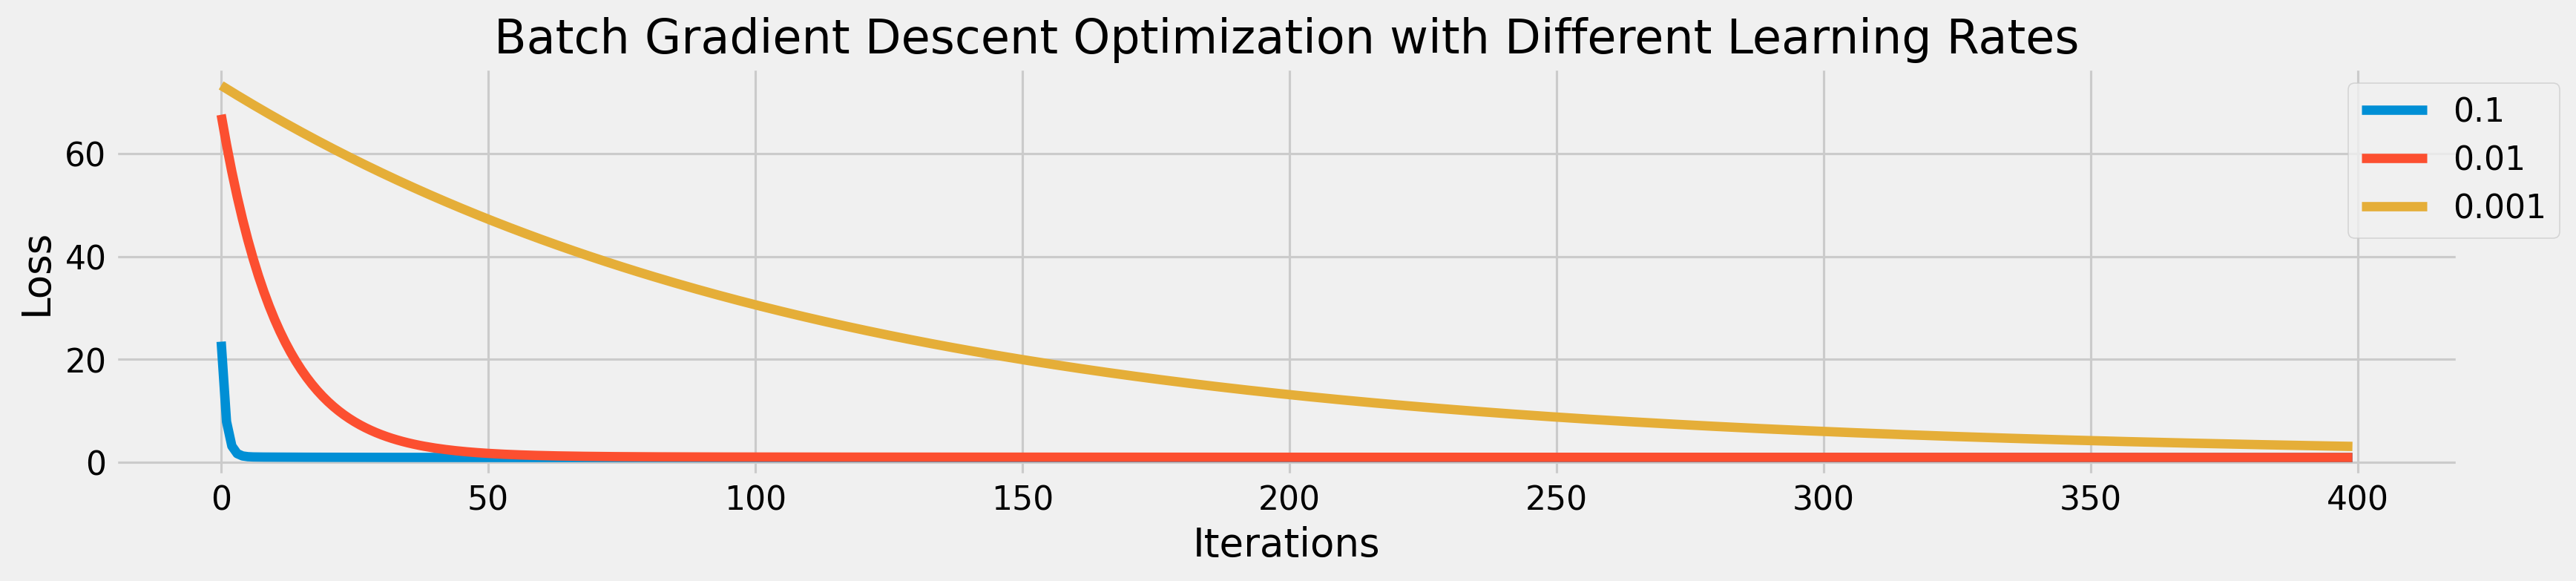

time: 563 ms (started: 2023-05-19 21:59:50 +00:00)


In [40]:
fig, ax = plt.subplots(figsize=(16,3))

plt.plot(cost_values_1, label='0.1')
plt.plot(cost_values_2, label='0.01')
plt.plot(cost_values_3, label='0.001')
plt.title('Batch Gradient Descent Optimization with Different Learning Rates')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.05, 1.0));

In [41]:
def stochastic_gradient_descent(x, y, learning_rate, iterations):
        
    '''
    Stochastic Gradient Descent for a single feature
    '''
    
    m, b = 0.5, 0.5 # initial parameters
    params, loss = [], [] # lists to store learning process
    
    for iteration in range(iterations):
        
        indexes = np.random.randint(0, len(x), 1) # random sample
        
        xi = np.take(x, indexes)
        yi = np.take(y, indexes)
        N = len(xi)
        
        func = yi - (m*xi + b)
        
        # Updating parameters m and b
        m -= learning_rate * (-2 * xi.dot(func).sum() / N)
        b -= learning_rate * (-2 * func.sum() / N)
        
        params.append((m, b))
        loss.append(mean_squared_error(y, m*x+b))        
    
    return m, b, params, loss

time: 1.46 ms (started: 2023-05-19 22:00:18 +00:00)


In [42]:
m, b, params, loss = stochastic_gradient_descent(x, y, learning_rate=0.01, iterations=1000)

time: 325 ms (started: 2023-05-19 22:00:22 +00:00)


MSE: 0.9666234718134418


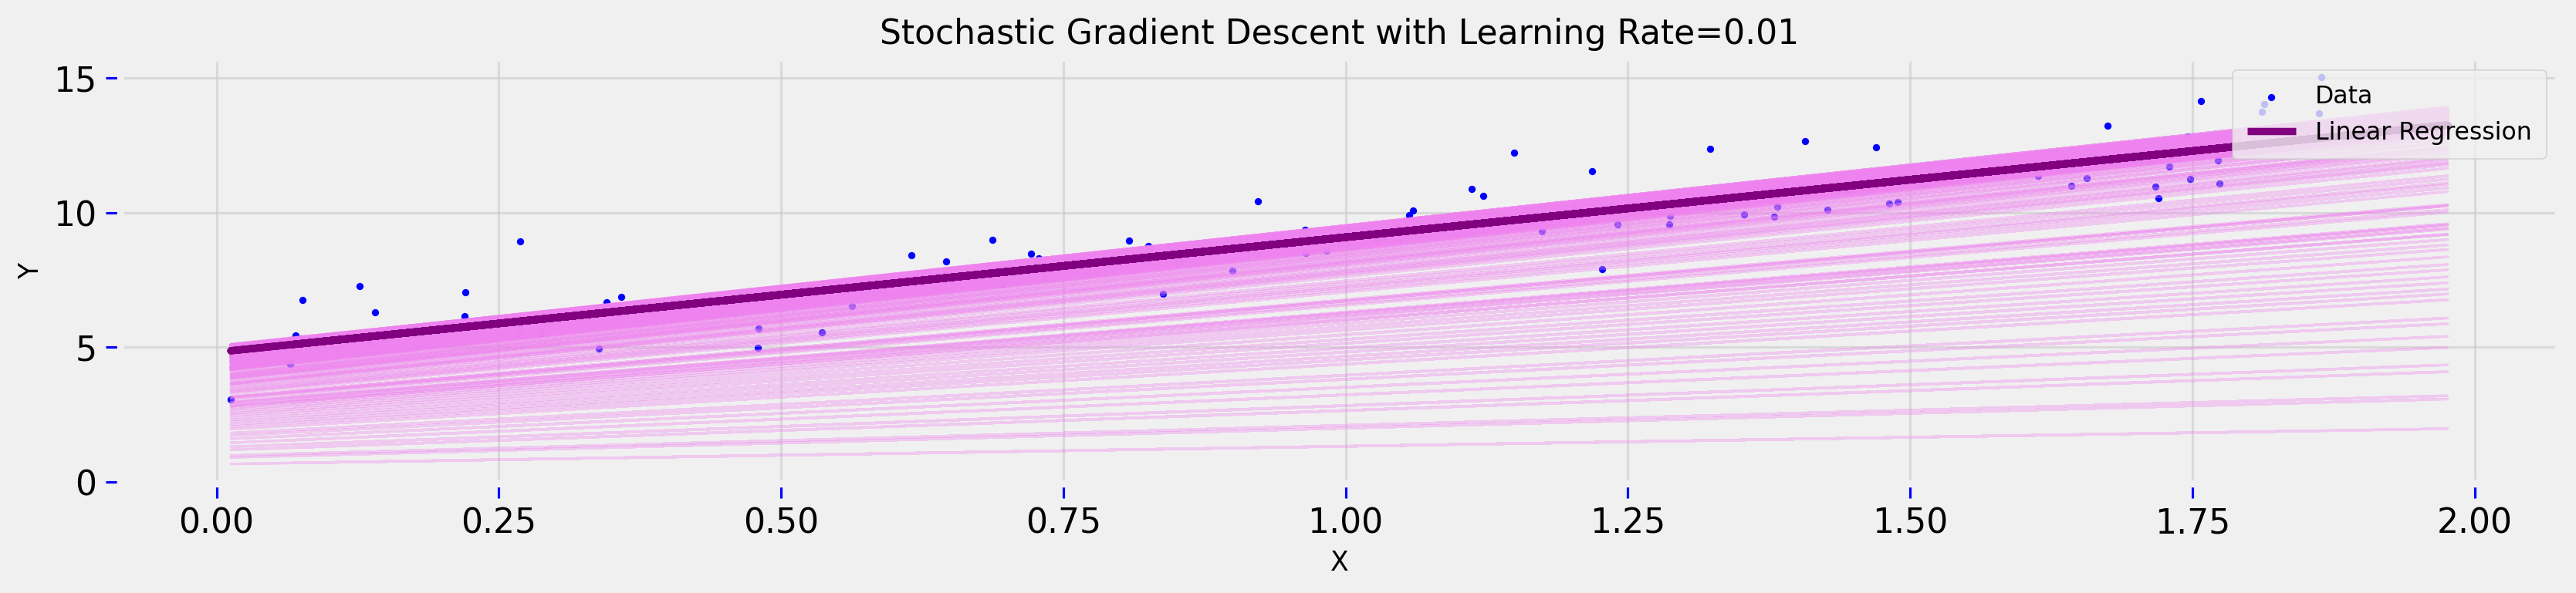

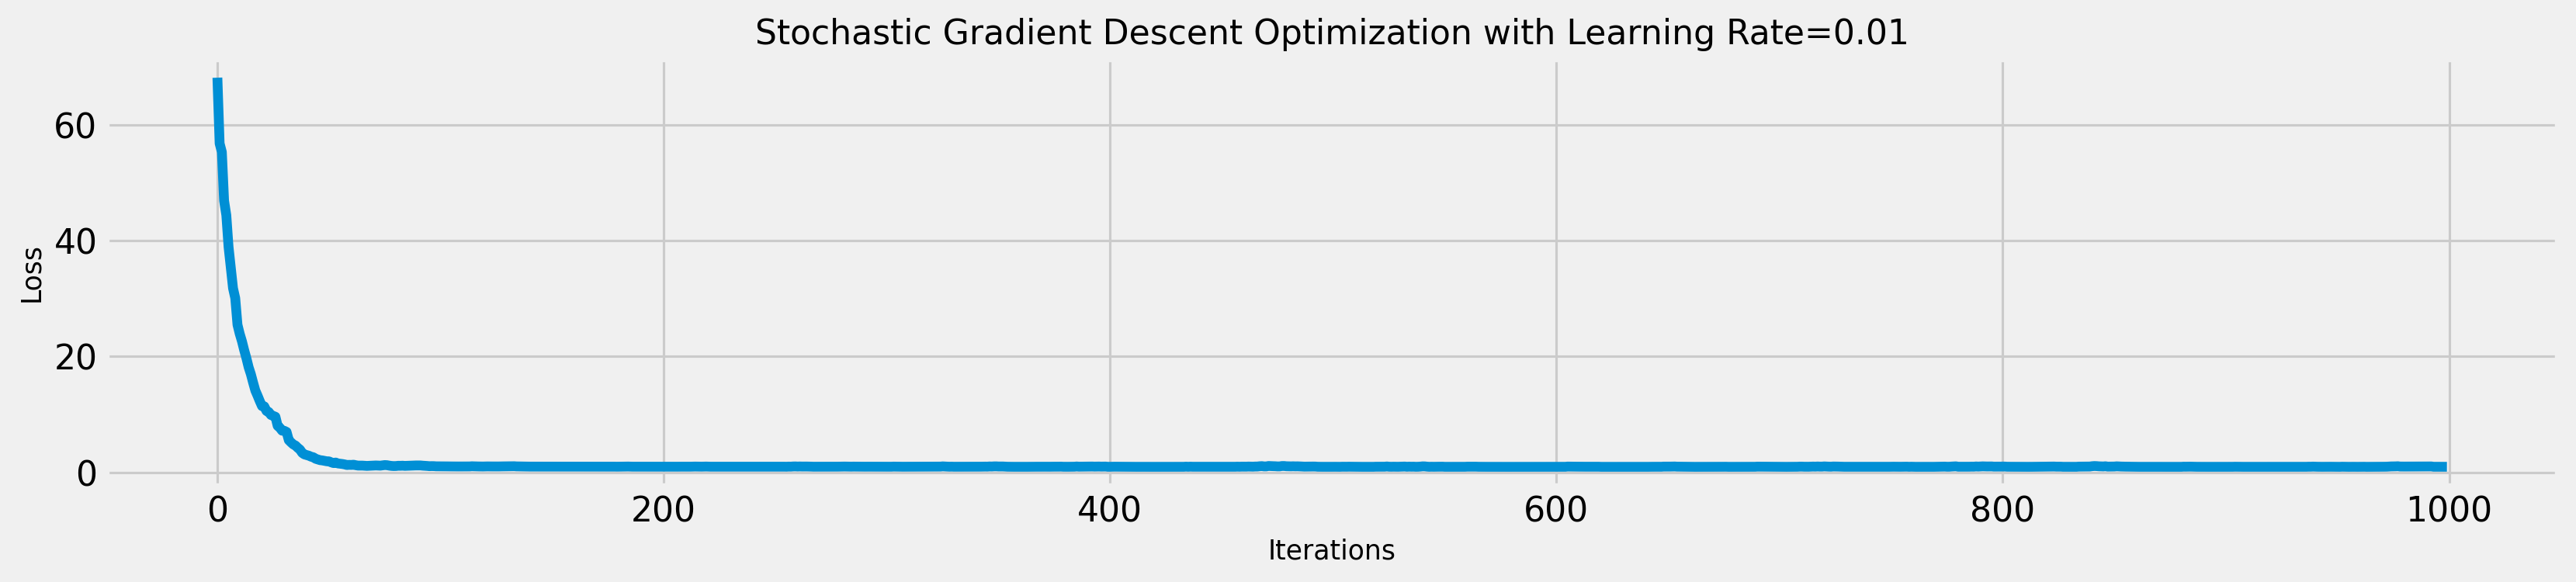

time: 18.6 s (started: 2023-05-19 22:00:27 +00:00)


In [43]:
y_pred = m*x + b

print("MSE:",mean_squared_error(y, y_pred))
plot_regression(x, y, y_pred, params=params, title="Stochastic Gradient Descent with Learning Rate=0.01")

plt.figure(figsize=(16,3))
plt.rcParams['figure.dpi'] = 227
plt.plot(range(len(loss)), loss)
plt.title('Stochastic Gradient Descent Optimization with Learning Rate=0.01', fontsize=14)
plt.xlabel('Iterations', fontsize=11)
plt.ylabel('Loss', fontsize=11)
plt.show()

In [57]:
m, b, params, loss = stochastic_gradient_descent(x, y, learning_rate=0.001, iterations=1000)

time: 253 ms (started: 2023-05-19 22:15:01 +00:00)


MSE: 1.0384340451374212


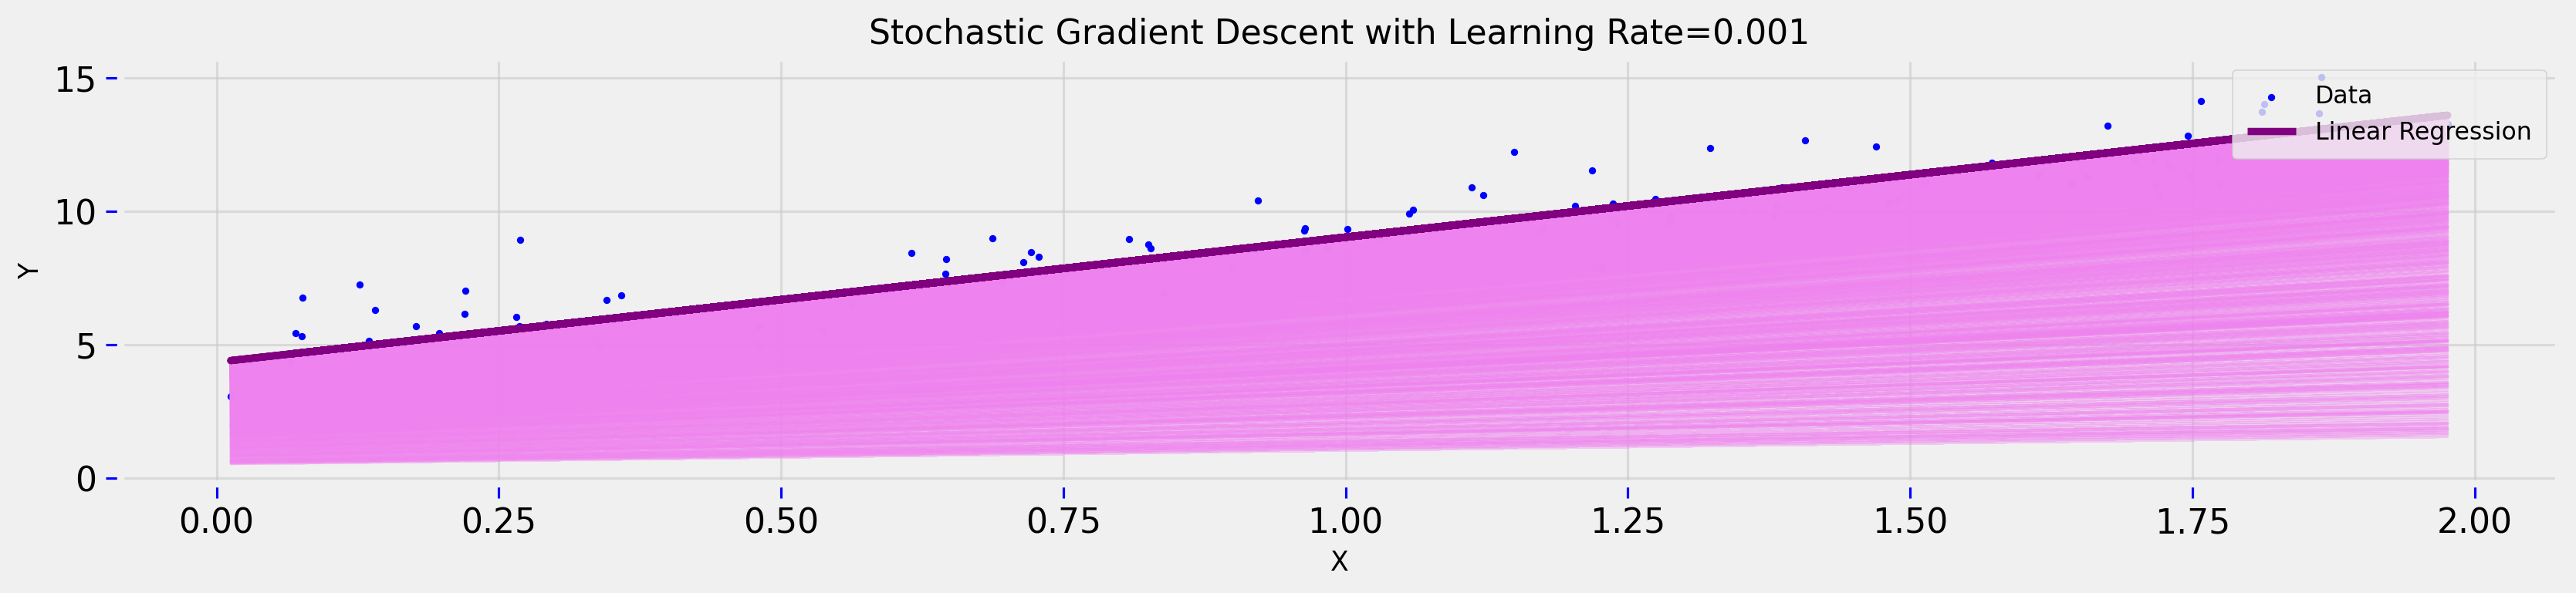

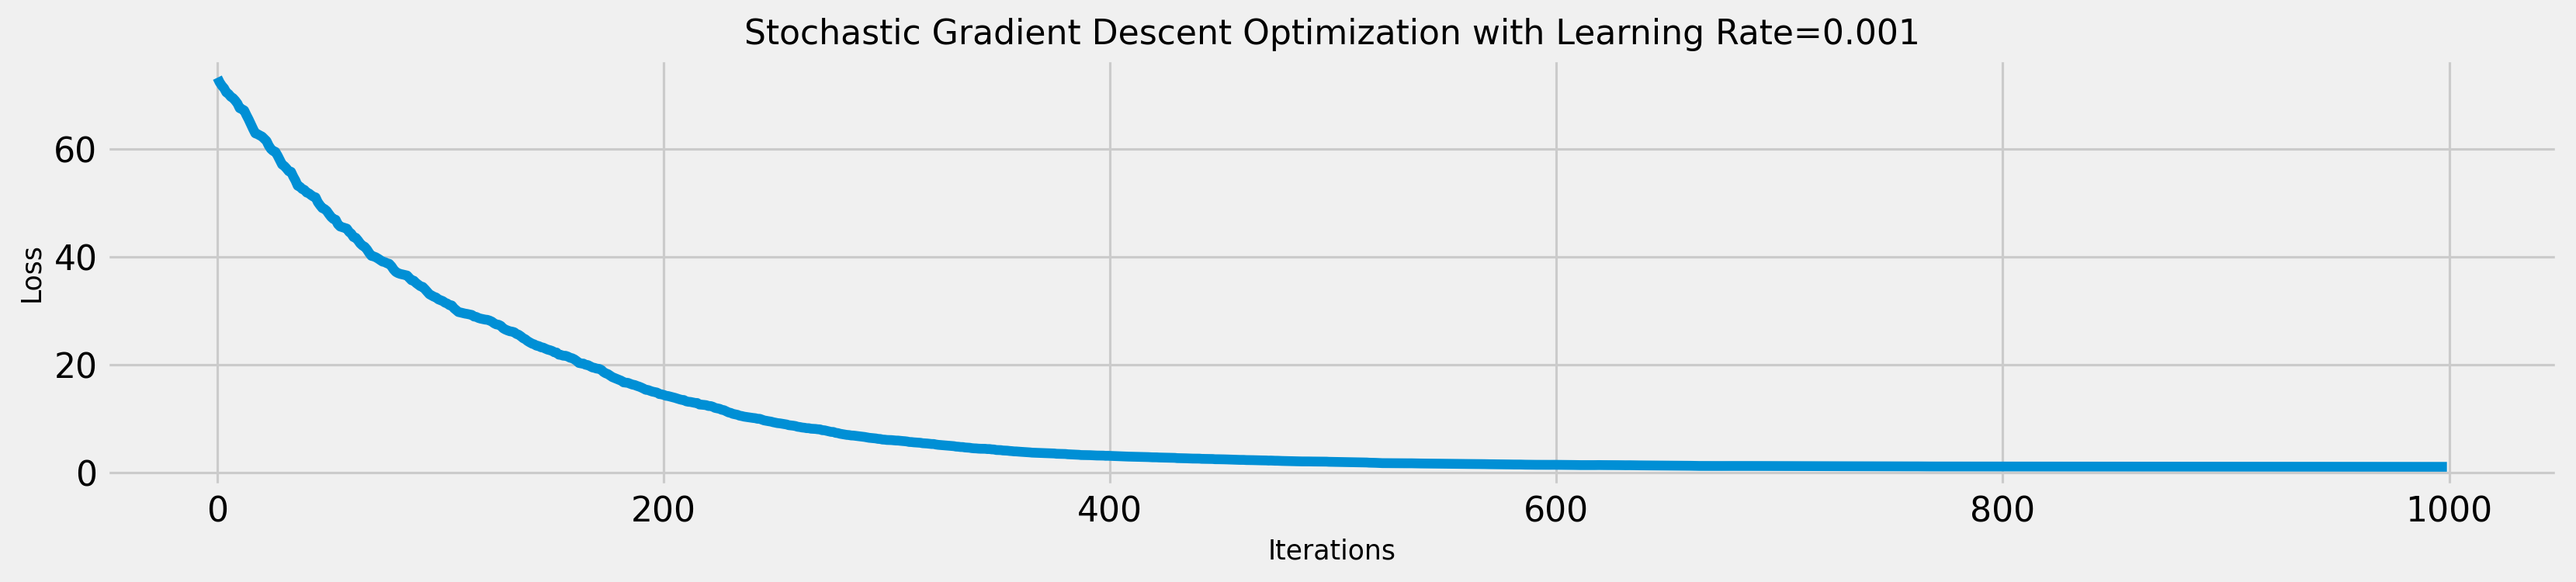

time: 15.1 s (started: 2023-05-19 22:15:06 +00:00)


In [58]:
y_pred = m*x + b

print("MSE:",mean_squared_error(y, y_pred))
plot_regression(x, y, y_pred, params=params, title="Stochastic Gradient Descent with Learning Rate=0.001")

plt.figure(figsize=(16,3))
plt.rcParams['figure.dpi'] = 227
plt.plot(range(len(loss)), loss)
plt.title('Stochastic Gradient Descent Optimization with Learning Rate=0.001', fontsize=14)
plt.xlabel('Iterations', fontsize=11)
plt.ylabel('Loss', fontsize=11)
plt.show()

In [55]:
m, b, params, loss = stochastic_gradient_descent(x, y, learning_rate=0.1, iterations=1000)

time: 237 ms (started: 2023-05-19 22:14:34 +00:00)


MSE: 1.274542995202143


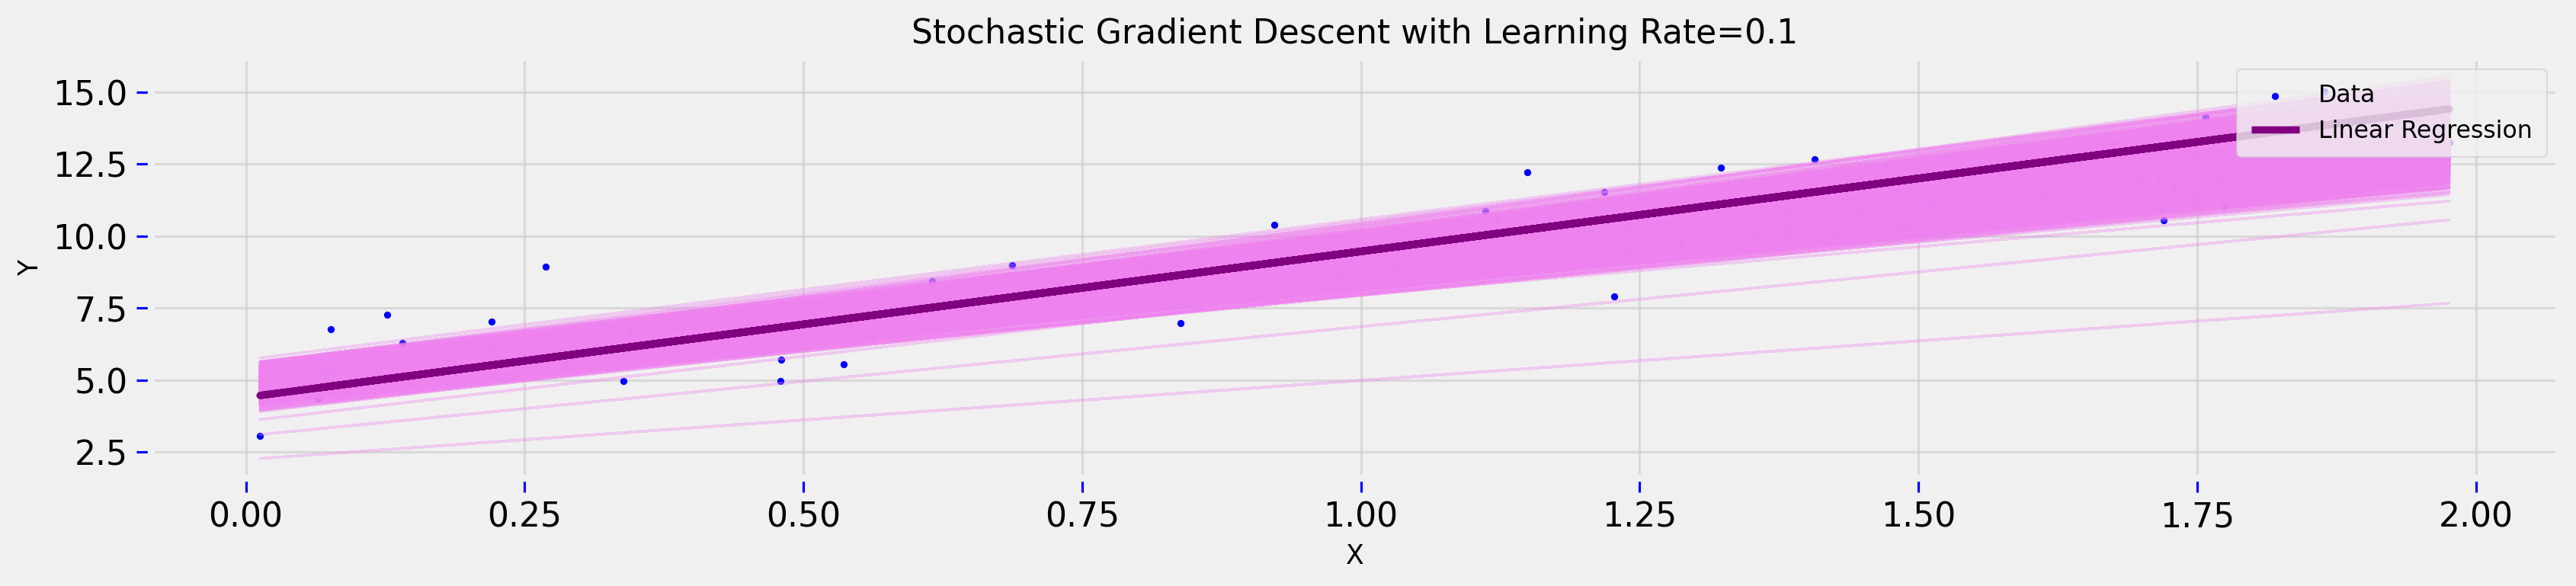

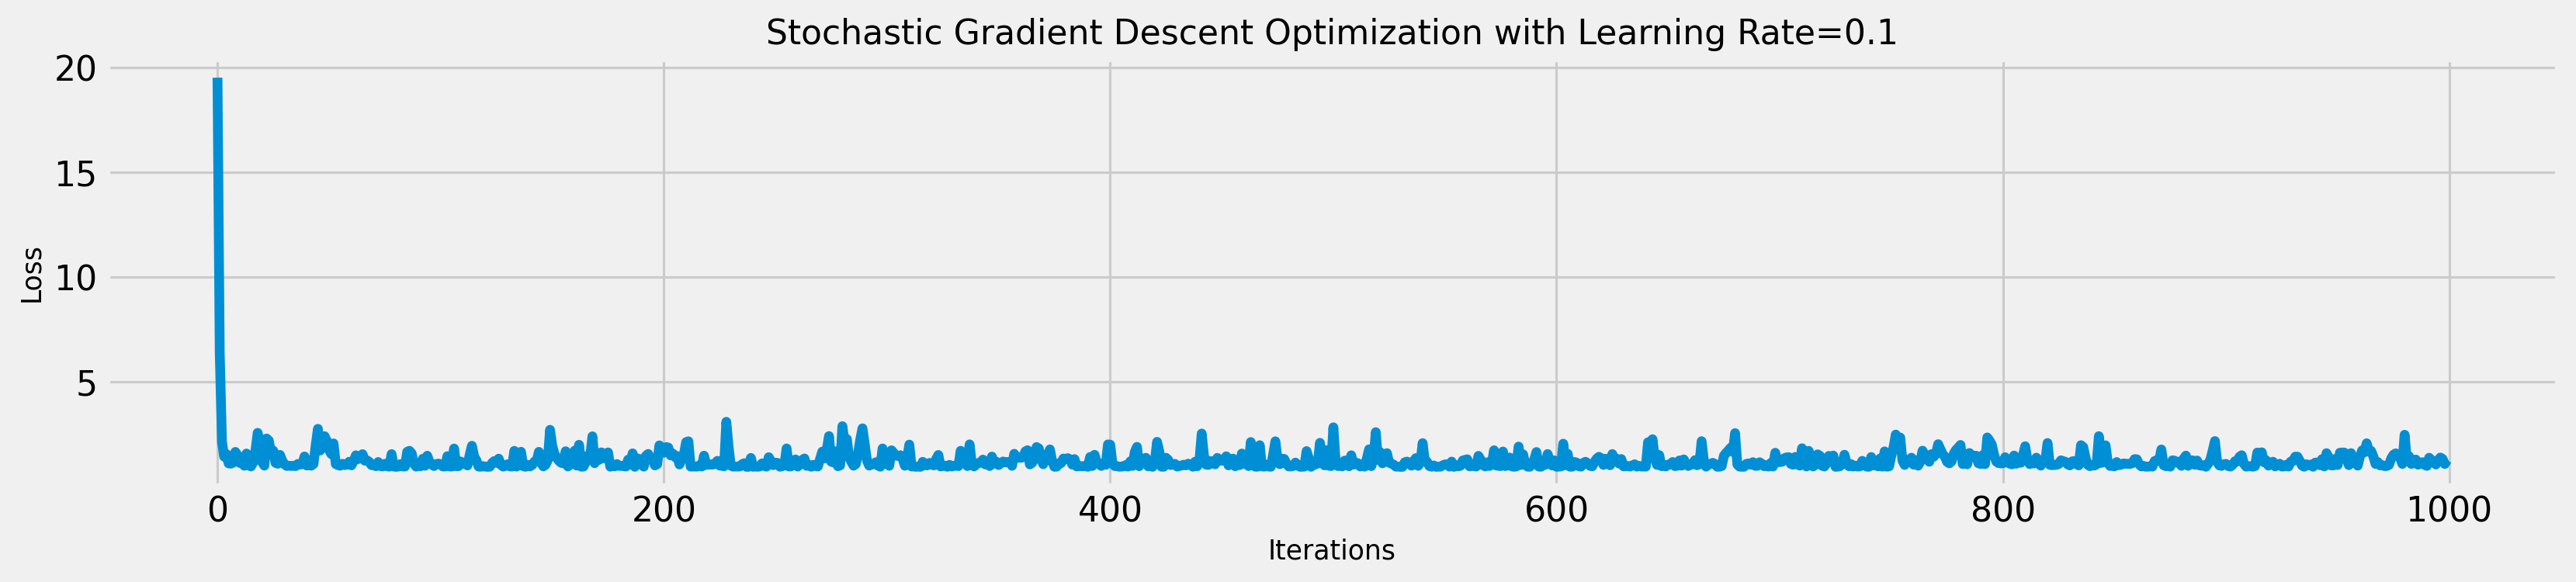

time: 15.3 s (started: 2023-05-19 22:14:36 +00:00)


In [56]:
y_pred = m*x + b

print("MSE:",mean_squared_error(y, y_pred))
plot_regression(x, y, y_pred, params=params, title="Stochastic Gradient Descent with Learning Rate=0.1")

plt.figure(figsize=(16,3))
plt.rcParams['figure.dpi'] = 227
plt.plot(range(len(loss)), loss)
plt.title('Stochastic Gradient Descent Optimization with Learning Rate=0.1', fontsize=14)
plt.xlabel('Iterations', fontsize=11)
plt.ylabel('Loss', fontsize=11)
plt.show()

In [59]:
def mini_batch_gradient_descent(x, y, learning_rate, iterations, batch_size):
        
    '''
    Stochastic Gradient Descent for a single feature
    '''
    
    m, b = 0.5, 0.5 # initial parameters
    params, loss = [], [] # lists to store learning process
    
    for iteration in range(iterations):
        
        indexes = np.random.randint(0, len(x), batch_size) # random sample
        
        xi = np.take(x, indexes)
        yi = np.take(y, indexes)
        N = len(xi)
        
        func = yi - (m*xi + b)
        
        # Updating parameters m and b
        m -= learning_rate * (-2 * xi.dot(func).sum() / N)
        b -= learning_rate * (-2 * func.sum() / N)
        
        params.append((m, b))
        loss.append(mean_squared_error(y, m*x+b))        
    
    return m, b, params, loss

time: 1.37 ms (started: 2023-05-19 22:35:32 +00:00)


In [60]:
m, b, params, loss = mini_batch_gradient_descent(x, y, learning_rate=0.01, iterations=1000, batch_size=10)

time: 224 ms (started: 2023-05-19 22:35:47 +00:00)


MSE: 0.9691150446957273


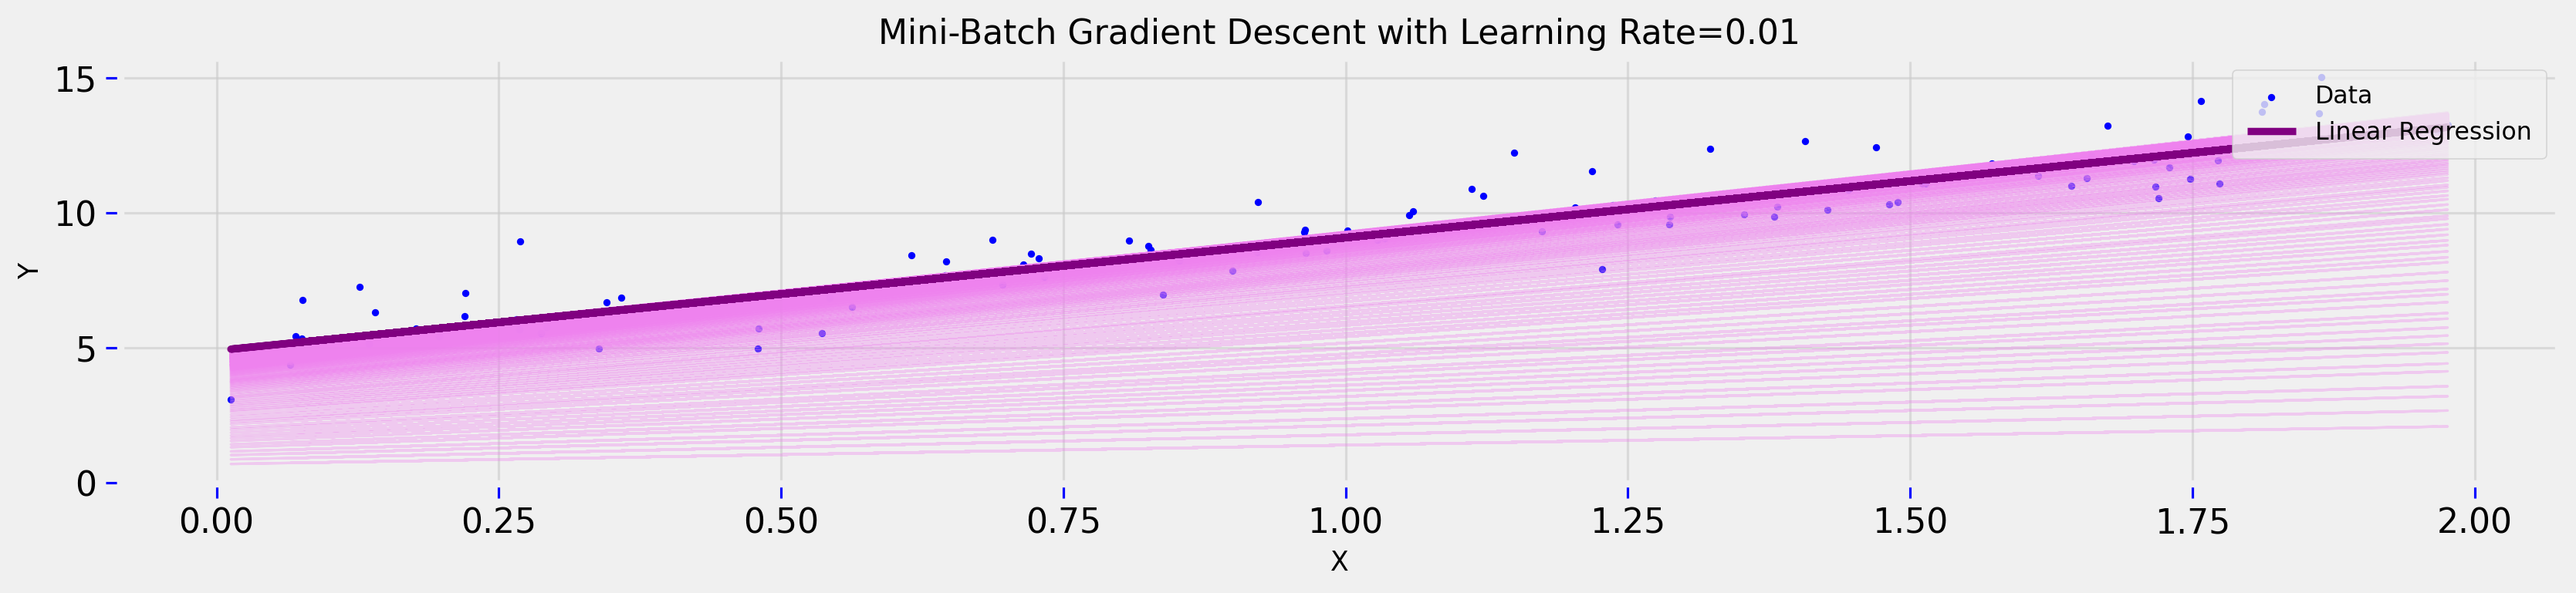

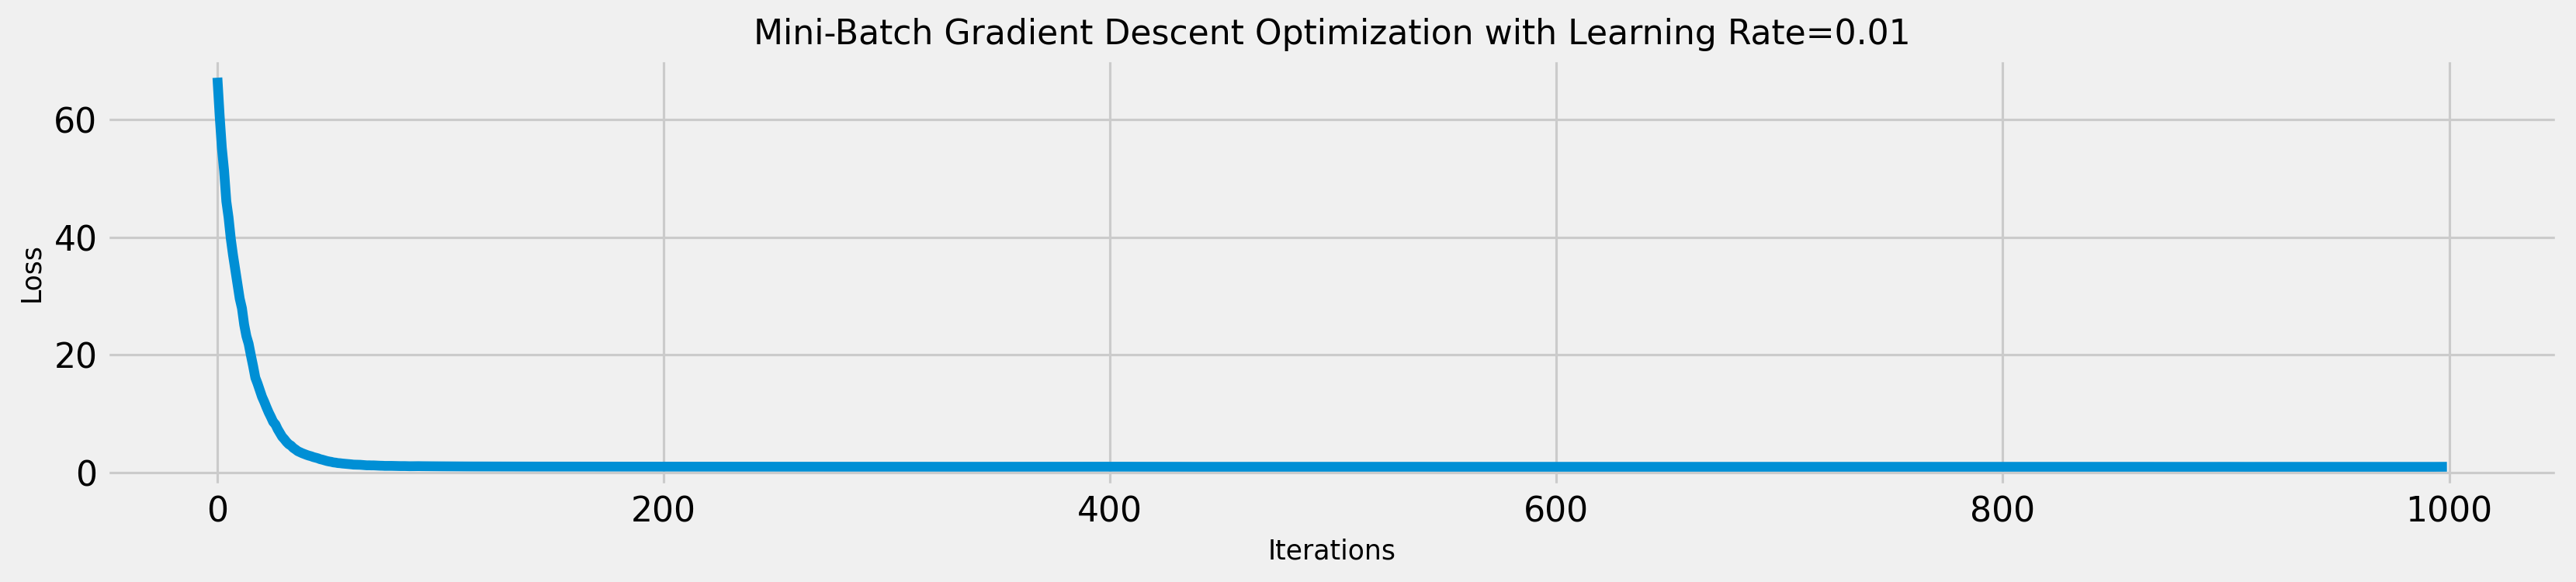

time: 15.1 s (started: 2023-05-19 22:35:51 +00:00)


In [61]:
y_pred = m*x + b

print("MSE:",mean_squared_error(y, y_pred))
plot_regression(x, y, y_pred, params=params, title="Mini-Batch Gradient Descent with Learning Rate=0.01")

plt.figure(figsize=(16,3))
plt.rcParams['figure.dpi'] = 227
plt.plot(range(len(loss)), loss)
plt.title('Mini-Batch Gradient Descent Optimization with Learning Rate=0.01', fontsize=14)
plt.xlabel('Iterations', fontsize=11)
plt.ylabel('Loss', fontsize=11)
plt.show()

In [62]:
m, b, params, loss = mini_batch_gradient_descent(x, y, learning_rate=0.001, iterations=1000, batch_size=10)

time: 485 ms (started: 2023-05-19 22:36:22 +00:00)


MSE: 1.0464511022219471


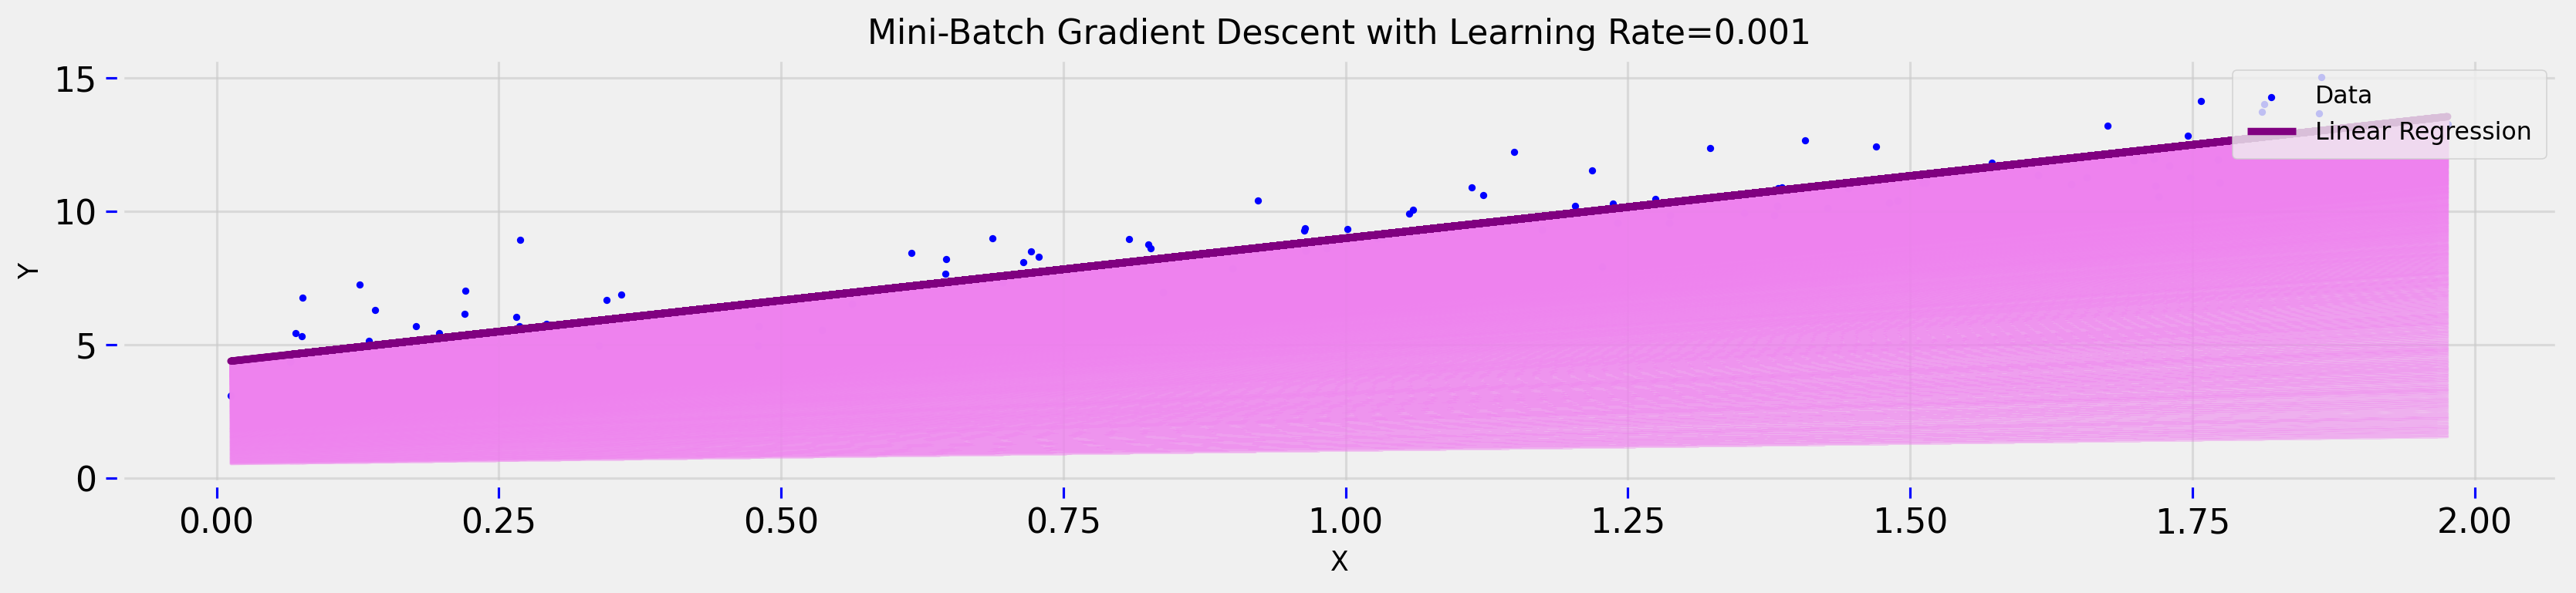

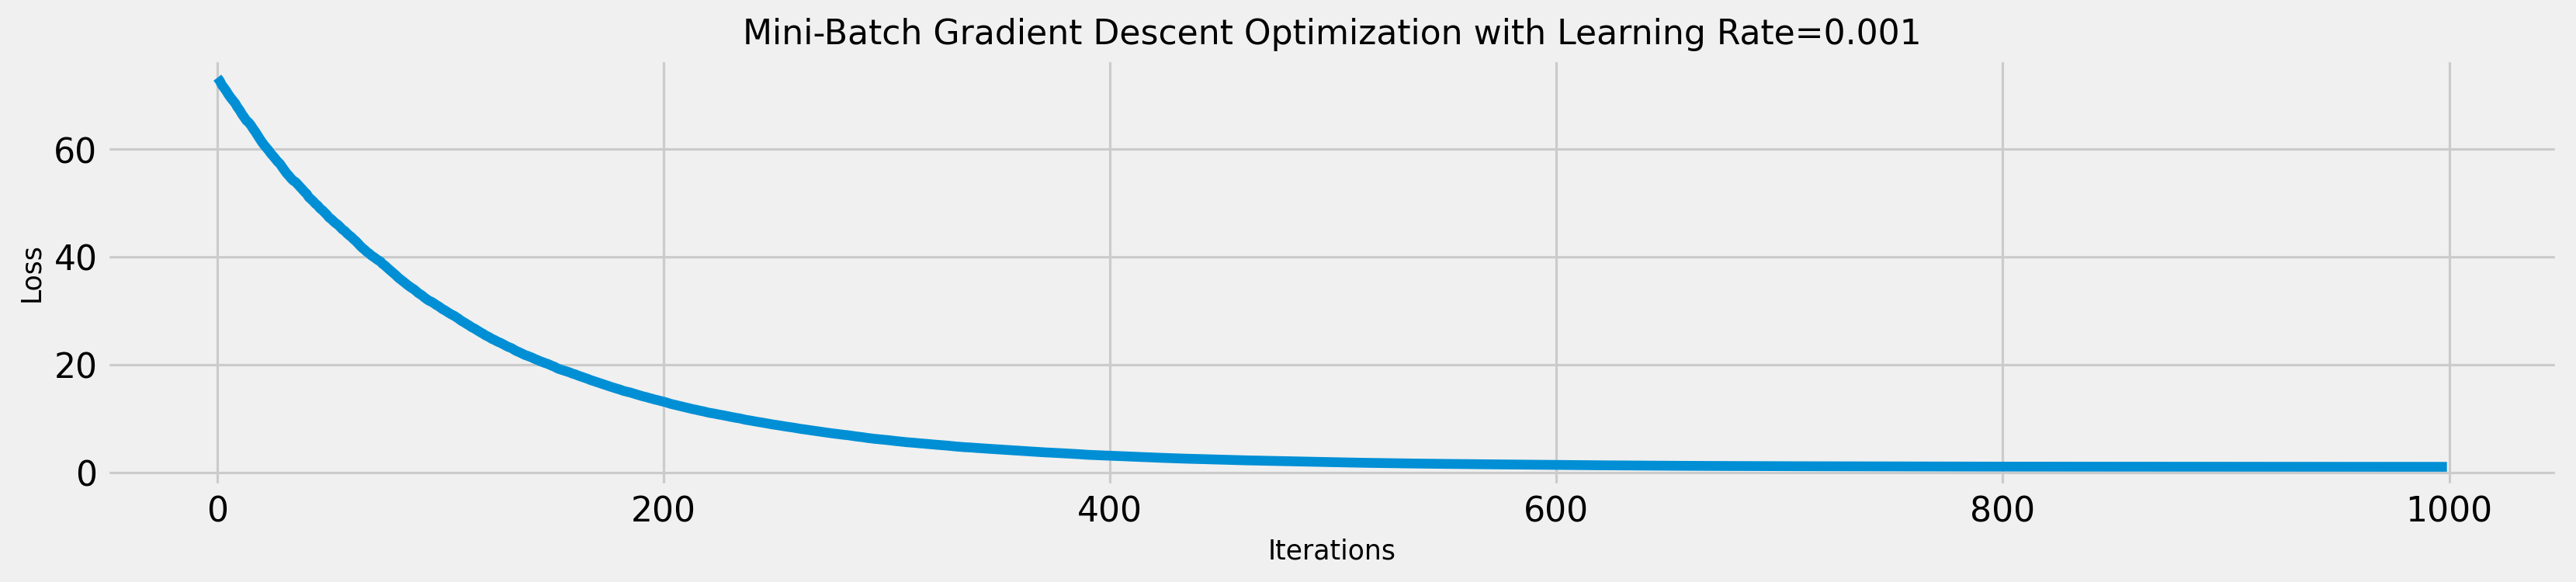

time: 18 s (started: 2023-05-19 22:36:23 +00:00)


In [63]:
y_pred = m*x + b

print("MSE:",mean_squared_error(y, y_pred))
plot_regression(x, y, y_pred, params=params, title="Mini-Batch Gradient Descent with Learning Rate=0.001")

plt.figure(figsize=(16,3))
plt.rcParams['figure.dpi'] = 227
plt.plot(range(len(loss)), loss)
plt.title('Mini-Batch Gradient Descent Optimization with Learning Rate=0.001', fontsize=14)
plt.xlabel('Iterations', fontsize=11)
plt.ylabel('Loss', fontsize=11)
plt.show()

In [69]:
m, b, params, loss = mini_batch_gradient_descent(x, y, learning_rate=0.1, iterations=1000, batch_size=10)

time: 239 ms (started: 2023-05-19 22:49:23 +00:00)


MSE: 0.973885611788866


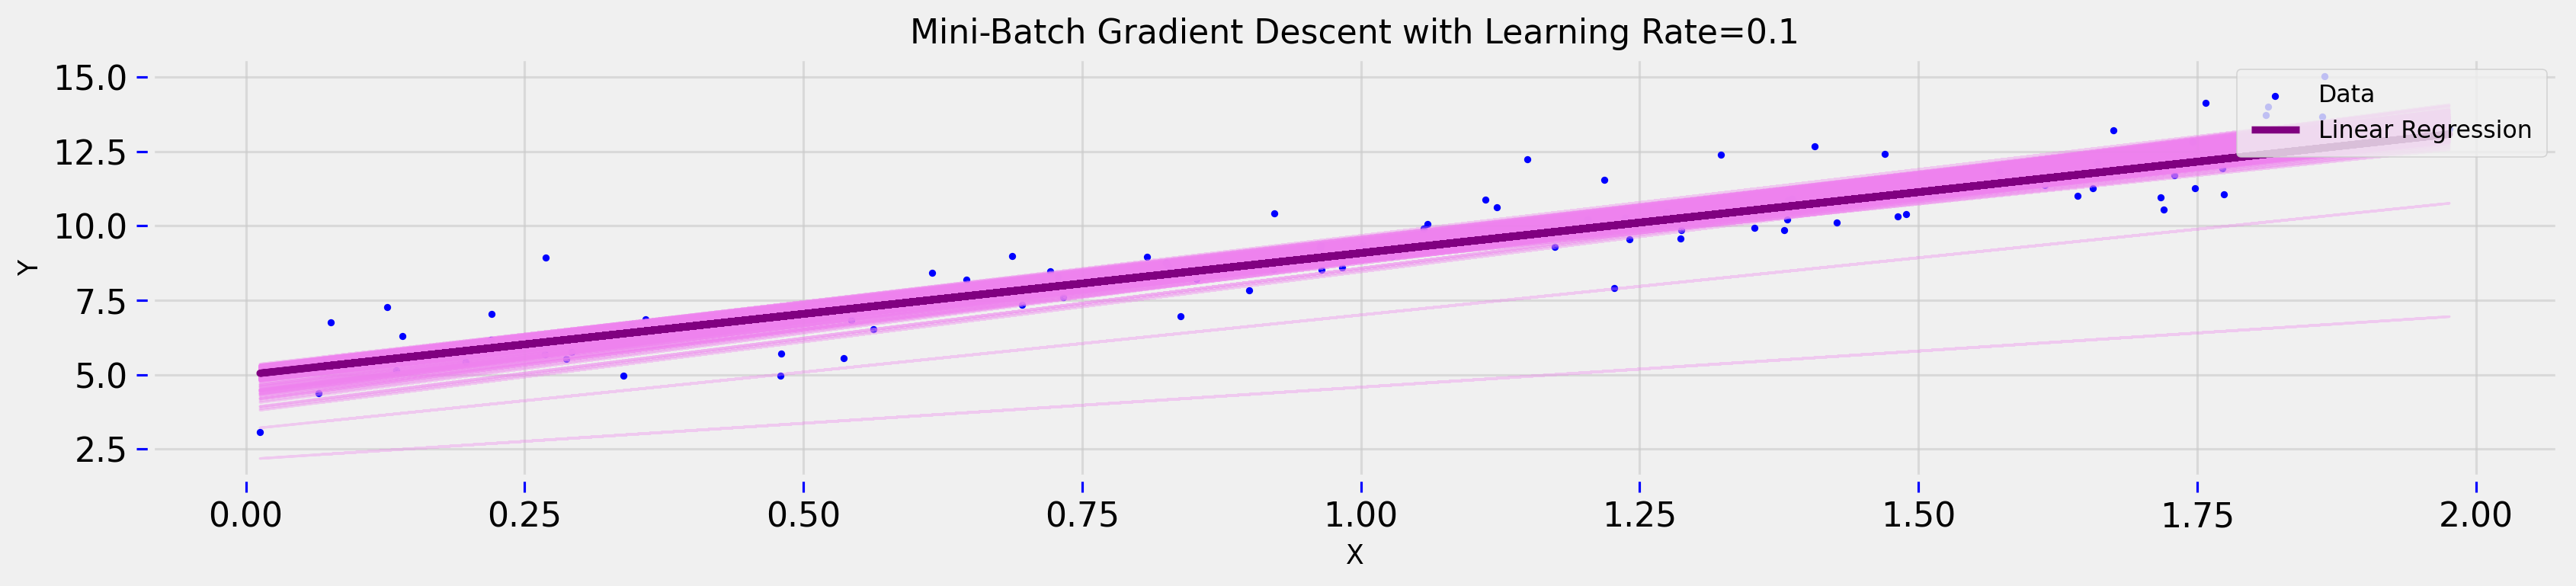

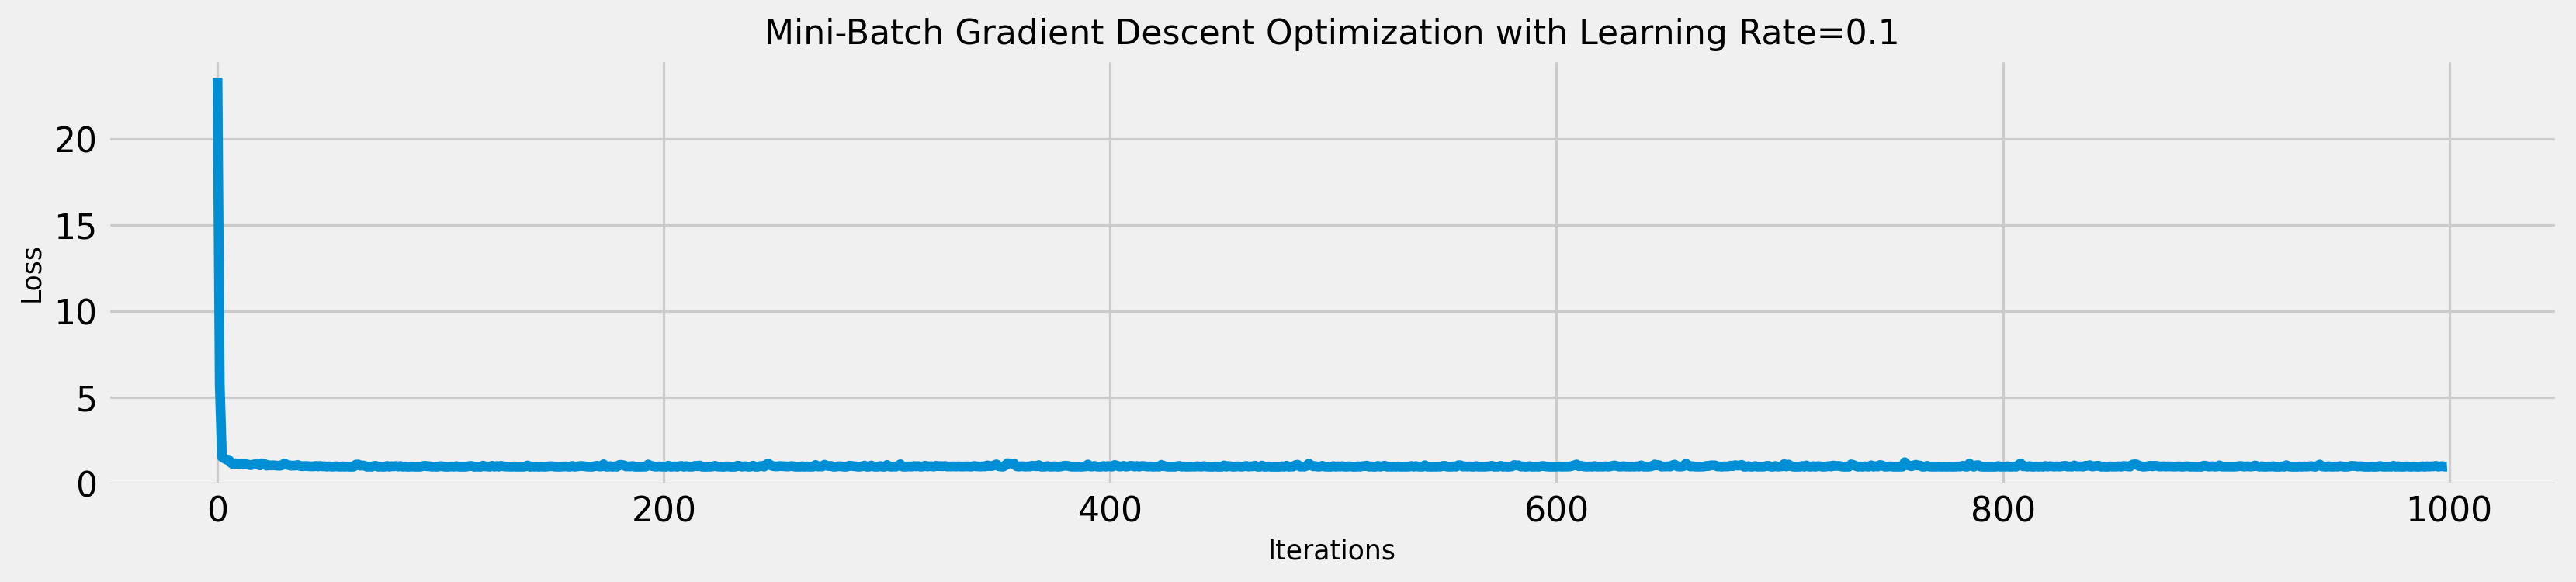

time: 14.4 s (started: 2023-05-19 22:49:25 +00:00)


In [70]:
y_pred = m*x + b

print("MSE:",mean_squared_error(y, y_pred))
plot_regression(x, y, y_pred, params=params, title="Mini-Batch Gradient Descent with Learning Rate=0.1")

plt.figure(figsize=(16,3))
plt.rcParams['figure.dpi'] = 227
plt.plot(range(len(loss)), loss)
plt.title('Mini-Batch Gradient Descent Optimization with Learning Rate=0.1', fontsize=14)
plt.xlabel('Iterations', fontsize=11)
plt.ylabel('Loss', fontsize=11)
plt.show()